In [1]:
import os
import pandas as pd
import featuretools as ft

### Import data

In [2]:
df = pd.read_csv('./data/energydata_complete.csv')
dfc_tmp = ft.demo.load_mock_customer()
dfc = dfc_tmp["transactions"].merge(dfc_tmp["sessions"]).merge(dfc_tmp["customers"])

### Task 1 - Aggregating transactions with mathematical operations

In [3]:
data = dfc[['customer_id', 'transaction_id', 'transaction_time', 'amount']]

In [4]:
data

,customer_id,transaction_id,transaction_time,amount
0,2,298,2014-01-01 00:00:00,127.64
1,2,2,2014-01-01 00:01:05,109.48
2,2,308,2014-01-01 00:02:10,95.06
3,2,116,2014-01-01 00:03:15,78.92
4,2,371,2014-01-01 00:04:20,31.54
...,...,...,...,...
495,3,112,2014-01-01 08:56:15,55.42
496,3,111,2014-01-01 08:57:20,34.87
497,3,276,2014-01-01 08:58:25,10.94
498,3,266,2014-01-01 08:59:30,19.86


In [5]:
operations = ['sum', 'max', 'min', 'mean', 'median', 'std', 'count']
feature_names = [oper + '_value' for oper in operations]

In [6]:
data.groupby('customer_id')['amount'].agg(operations)

,sum,max,min,mean,median,std,count
customer_id,,,,,,,
1,9025.62,139.43,5.81,71.631905,69.715,40.442059,126
2,7200.28,146.81,8.73,77.422366,75.960,37.705178,93
3,6236.62,149.15,5.89,67.060430,58.930,43.683296,93
4,8727.68,149.95,5.73,80.070459,81.410,45.068765,109
5,6349.66,149.02,7.55,80.375443,78.870,44.095630,79


### Task 2 - Aggregating transactions in a time window

In [7]:
tmp_df = df[['date', 'Appliances', 'lights']]

In [8]:
tmp_df['date'] = pd.to_datetime(tmp_df['date'])

In [16]:
tmp_df.rolling(window=6, on='date').mean().head(10)

,date,Appliances,lights
0,2016-01-11 17:00:00,NaN,NaN
1,2016-01-11 17:10:00,NaN,NaN
2,2016-01-11 17:20:00,NaN,NaN
3,2016-01-11 17:30:00,NaN,NaN
4,2016-01-11 17:40:00,NaN,NaN
5,2016-01-11 17:50:00,55.000000,35.000000
6,2016-01-11 18:00:00,55.000000,38.333333
7,2016-01-11 18:10:00,55.000000,41.666667
8,2016-01-11 18:20:00,56.666667,43.333333
9,2016-01-11 18:30:00,60.000000,43.333333


In [10]:
operations = ['sum', 'max', 'min', 'mean', 'median', 'std', 'count']
oper_dict = {k: operations for k in ['Appliances', 'lights']}

In [19]:
tmp_df.set_index('date').rolling(window='60min').agg(oper_dict).head(10)

Appliances                                                \
                           sum   max   min       mean median       std count   
date                                                                           
2016-01-11 17:00:00       60.0  60.0  60.0  60.000000   60.0       NaN   1.0   
2016-01-11 17:10:00      120.0  60.0  60.0  60.000000   60.0  0.000000   2.0   
2016-01-11 17:20:00      170.0  60.0  50.0  56.666667   60.0  5.773503   3.0   
2016-01-11 17:30:00      220.0  60.0  50.0  55.000000   55.0  5.773503   4.0   
2016-01-11 17:40:00      280.0  60.0  50.0  56.000000   60.0  5.477226   5.0   
2016-01-11 17:50:00      330.0  60.0  50.0  55.000000   55.0  5.477226   6.0   
2016-01-11 18:00:00      330.0  60.0  50.0  55.000000   55.0  5.477226   6.0   
2016-01-11 18:10:00      330.0  60.0  50.0  55.000000   55.0  5.477226   6.0   
2016-01-11 18:20:00      340.0  60.0  50.0  56.666667   60.0  5.163978   6.0   
2016-01-11 18:30:00      360.0  70.0  50.0  60.000000   60.0  6.324555   6.0   

                    lights                                                
                       sum   max   min       mean median       std count  
date                                                                      
2016-01-11 17:00:00   30.0  30.0  30.0  30.000000   30.0       NaN   1.0  
2016-01-11 17:10:00   60.0  30.0  30.0  30.000000   30.0  0.000000   2.0  
2016-01-11 17:20:00   90.0  30.0  30.0  30.000000   30.0  0.000000   3.0  
2016-01-11 17:30:00  130.0  40.0  30.0  32.500000   30.0  5.000000   4.0  
2016-01-11 17:40:00  170.0  40.0  30.0  34.000000   30.0  5.477226   5.0  
2016-01-11 17:50:00  210.0  40.0  30.0  35.000000   35.0  5.477226   6.0  
2016-01-11 18:00:00  230.0  50.0  30.0  38.333333   40.0  7.527727   6.0  
2016-01-11 18:10:00  250.0  50.0  30.0  41.666667   40.0  7.527727   6.0  
2016-01-11 18:20:00  260.0  50.0  40.0  43.333333   40.0  5.163978   6.0  
2016-01-11 18:30:00  260.0  50.0  40.0  43.333333   40.0  5.163978   6.0

In [20]:
tmp_df.set_index('date').rolling(window='60min', min_periods=6).agg(oper_dict).head(10)

Appliances                                                \
                           sum   max   min       mean median       std count   
date                                                                           
2016-01-11 17:00:00        NaN   NaN   NaN        NaN    NaN       NaN   NaN   
2016-01-11 17:10:00        NaN   NaN   NaN        NaN    NaN       NaN   NaN   
2016-01-11 17:20:00        NaN   NaN   NaN        NaN    NaN       NaN   NaN   
2016-01-11 17:30:00        NaN   NaN   NaN        NaN    NaN       NaN   NaN   
2016-01-11 17:40:00        NaN   NaN   NaN        NaN    NaN       NaN   NaN   
2016-01-11 17:50:00      330.0  60.0  50.0  55.000000   55.0  5.477226   6.0   
2016-01-11 18:00:00      330.0  60.0  50.0  55.000000   55.0  5.477226   6.0   
2016-01-11 18:10:00      330.0  60.0  50.0  55.000000   55.0  5.477226   6.0   
2016-01-11 18:20:00      340.0  60.0  50.0  56.666667   60.0  5.163978   6.0   
2016-01-11 18:30:00      360.0  70.0  50.0  60.000000   60.0  6.324555   6.0   

                    lights                                                
                       sum   max   min       mean median       std count  
date                                                                      
2016-01-11 17:00:00    NaN   NaN   NaN        NaN    NaN       NaN   NaN  
2016-01-11 17:10:00    NaN   NaN   NaN        NaN    NaN       NaN   NaN  
2016-01-11 17:20:00    NaN   NaN   NaN        NaN    NaN       NaN   NaN  
2016-01-11 17:30:00    NaN   NaN   NaN        NaN    NaN       NaN   NaN  
2016-01-11 17:40:00    NaN   NaN   NaN        NaN    NaN       NaN   NaN  
2016-01-11 17:50:00  210.0  40.0  30.0  35.000000   35.0  5.477226   6.0  
2016-01-11 18:00:00  230.0  50.0  30.0  38.333333   40.0  7.527727   6.0  
2016-01-11 18:10:00  250.0  50.0  30.0  41.666667   40.0  7.527727   6.0  
2016-01-11 18:20:00  260.0  50.0  40.0  43.333333   40.0  5.163978   6.0  
2016-01-11 18:30:00  260.0  50.0  40.0  43.333333   40.0  5.163978   6.0

#### Task 3 - Determining the number of local maxima and minima

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [23]:
data = pd.read_csv('data/energydata_complete.csv')

In [25]:
data['date'] = pd.to_datetime(data['date'])

In [27]:
data[['day', 'month', 'hr']] = pd.DataFrame([(x.day, x.month, x.hour) for x in data['date']])

<AxesSubplot: xlabel='hr'>

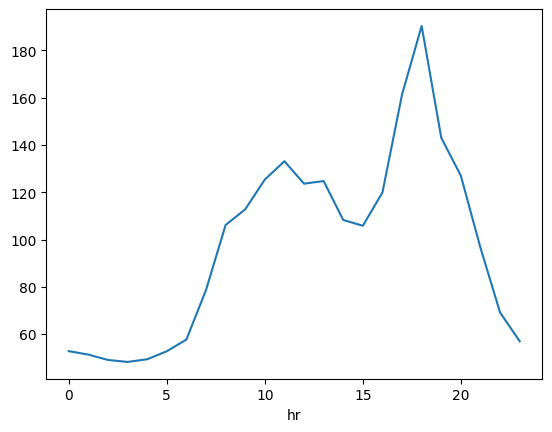

In [28]:
data.groupby('hr')['Appliances'].mean().plot()

In [29]:
daily_ec = data.groupby(['month', 'day'])['Appliances'].mean()

In [30]:
peaks, _ = find_peaks(daily_ec, height=60)

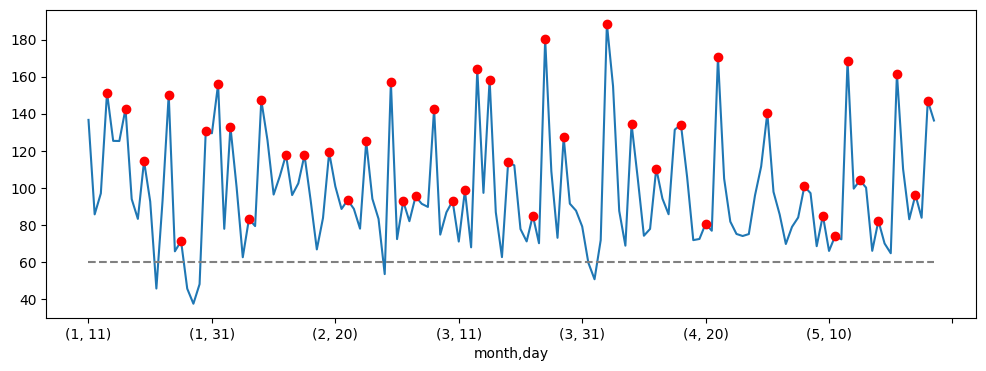

In [32]:
plt.figure(figsize=(12, 4))
daily_ec.plot()
plt.plot(peaks, daily_ec.values[peaks], "o", color='red') 
plt.plot(np.full_like(daily_ec, 60), "--", color="gray")
plt.show()

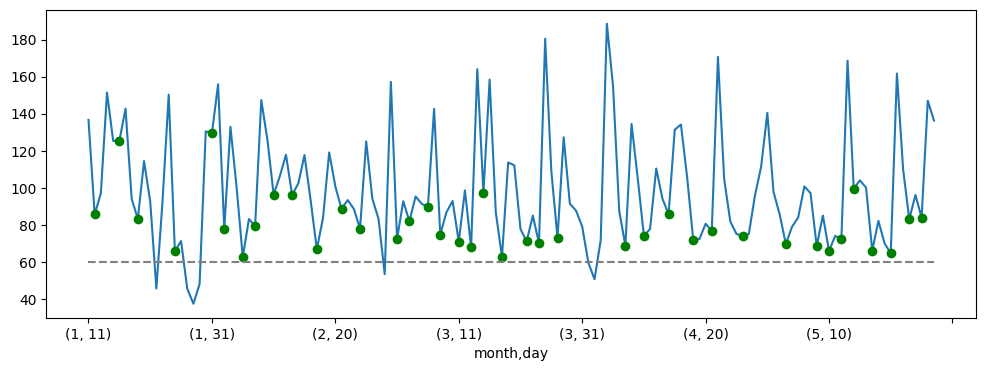

In [33]:
valleys, _ = find_peaks(1/daily_ec, height=(0, 1/60))
plt.figure(figsize=(12, 4))
daily_ec.plot()
plt.plot(valleys, daily_ec.values[valleys], "o", color='green')
plt.plot(np.full_like(daily_ec, 60), "--", color="gray")
plt.show()

#### Task 4 - Deriving time elapsed between time- stamped events

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [36]:
data = pd.read_csv('data/energydata_complete.csv')
data['date'] = pd.to_datetime(data['date'])

In [37]:
data['time_since_previous'] = data['date'].diff()
data['time_since_previous'] = data['time_since_previous'] /np.timedelta64(1,'m')

In [38]:
data[['day', 'month']] = pd.DataFrame([(x.day, x.month) for x in data['date']])

In [39]:
data.index = data['date']

In [40]:
elec_pday = data.groupby(['month', 'day'])['Appliances'].mean()

In [42]:
peaks, _ = find_peaks(elec_pday.values, height=60)
peaks

array([  3,   6,   9,  13,  15,  19,  21,  23,  26,  28,  32,  35,  39,
        42,  45,  49,  51,  53,  56,  59,  61,  63,  65,  68,  72,  74,
        77,  84,  88,  92,  96, 100, 102, 110, 116, 119, 121, 123, 125,
       128, 131, 134, 136])

In [45]:
tmp = pd.DataFrame(elec_pday.iloc[peaks]).reset_index(drop=False) 
tmp['year'] = 2016
tmp.head()

,month,day,Appliances,year
0,1,14,151.388889,2016
1,1,17,142.708333,2016
2,1,20,114.444444,2016
3,1,24,150.277778,2016
4,1,26,71.319444,2016
